# **Import Libraries**

In [21]:
# 1️⃣ Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


#**Load Dataset**

In [22]:
# 2️⃣ Load Dataset
data = pd.read_csv('/content/features_3_sec.csv')
print("Dataset shape:", data.shape)
data.head()

Dataset shape: (9990, 60)


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


#**Preprocess Data**

In [23]:
# 3️⃣ Preprocess Data
# Extract genre label from filename
data['label'] = data['filename'].apply(lambda x: x.split('.')[0])

# Features & target
X = data.drop(columns=['filename', 'label'])
y = data['label']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode target labels
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42
)

#**ANN Model**

In [24]:
input_dim = X_train.shape[1]
output_dim = y_train.shape[1]

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(input_dim,)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(output_dim, activation='softmax'))

#**Compile Model**

In [25]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#**Training Model**

In [26]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.2877 - loss: 1.9991 - val_accuracy: 0.5660 - val_loss: 1.2532
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5304 - loss: 1.3245 - val_accuracy: 0.6448 - val_loss: 1.0481
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5987 - loss: 1.1208 - val_accuracy: 0.6785 - val_loss: 0.9249
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6387 - loss: 1.0337 - val_accuracy: 0.7042 - val_loss: 0.8544
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6743 - loss: 0.9507 - val_accuracy: 0.7154 - val_loss: 0.8100
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6848 - loss: 0.8942 - val_accuracy: 0.7367 - val_loss: 0.7619
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6962 - loss: 0.8635 - val_accuracy: 0.7461 - val_loss: 0.7225
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7146 - loss: 0.8301 - val_accuracy: 0

#**Evaluating Model**

In [27]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {accuracy:.4f}")


Test Accuracy: 0.8719


#**Classification Report**

In [28]:
y_pred_probs = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test, axis=1)
print("\nClassification Report:\n", classification_report(y_true_labels, y_pred_labels, target_names=encoder.categories_[0]))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Classification Report:
               precision    recall  f1-score   support

       blues       0.89      0.84      0.86       208
   classical       0.91      0.96      0.93       203
     country       0.78      0.88      0.82       186
       disco       0.84      0.82      0.83       199
      hiphop       0.95      0.83      0.89       218
        jazz       0.89      0.90      0.89       192
       metal       0.91      0.94      0.92       204
         pop       0.87      0.93      0.90       180
      reggae       0.86      0.88      0.87       211
        rock       0.82      0.77      0.79       197

    accuracy                           0.87      1998
   macro avg       0.87      0.87      0.87      1998
weighted avg       0.87      0.87      0.87      1998



#**Loss Curve**

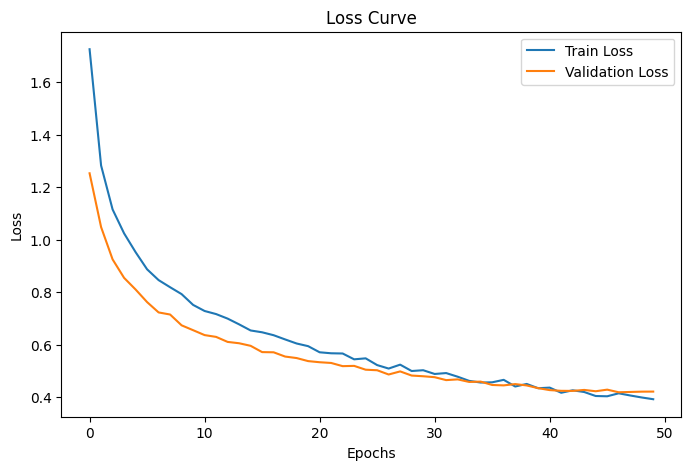

In [29]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

#**Actual  v/s  Predicted**

In [30]:
actual_labels = encoder.inverse_transform(y_test).ravel()
predicted_labels = encoder.inverse_transform(np.eye(output_dim)[y_pred_labels]).ravel()
comparison_df = pd.DataFrame({'Actual': actual_labels, 'Predicted': predicted_labels})
print("\nSample Predictions:\n", comparison_df.head(20))


Sample Predictions:
        Actual  Predicted
0      hiphop     reggae
1        jazz       jazz
2       blues      blues
3       blues      blues
4       metal      disco
5        rock       rock
6         pop        pop
7     country        pop
8     country    country
9       blues      blues
10     reggae     reggae
11    country    country
12       jazz       jazz
13     hiphop     hiphop
14    country    country
15     reggae        pop
16       jazz       jazz
17  classical  classical
18      disco      disco
19      disco      disco
